In [1]:
import gym
import numpy as np

from cea import cea_gen
from operators import mutate_gaussian
from operators import nhood_linear
from operators import recomb_singlepoint
from operators import sample_gaussian
from operators import select_linear

from functools import partial


def sample_action(sample, observation):
    return 1 if np.dot(observation, sample) > 0.0 else 0

def evaluate_episode(sample, env, length):
    total_reward = 0.0
    observation = env.reset()
    for step in range(length):
        action = sample_action(sample, observation)
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        if done: break
    return total_reward

def evaluate(population, env, length):
    eval_ep = partial(evaluate_episode, env=env, length=length)
    return np.apply_along_axis(eval_ep, 2, population)

In [2]:
DIMS = (4, 4)
NF   = 4
ENV = gym.make("CartPole-v1")

EVAL   = partial(evaluate, env=ENV, length=500)
NHOOD  = partial(nhood_linear, n=5)
SELECT = select_linear
RECOMB = recomb_singlepoint
MUTATE = partial(mutate_gaussian, sigma=0.005)

pop = sample_gaussian(DIMS + (NF,))
fit = EVAL(pop)

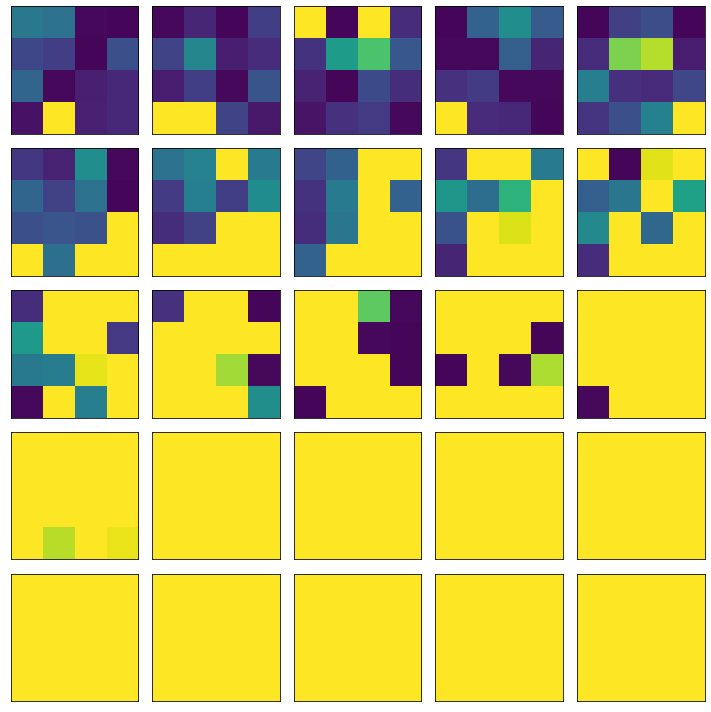

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(10, 10), subplot_kw={"xticks": (), "yticks": ()})

for _, ax in zip(range(5 * 5), axes.ravel()):
    pop, fit = cea_gen(pop, fit, DIMS, 
        f_evaluate=EVAL,
        f_nhood   =NHOOD,
        f_select  =SELECT,
        f_recomb  =RECOMB,
        f_mutate  =MUTATE)
    ax.imshow(fit, vmin=0, vmax=500)
    # print(fit)

fig.tight_layout()

In [4]:
example = pop[0][0]

observation = ENV.reset()
for step in range(500):
    ENV.render()
    action = sample_action(example, observation)
    observation, _, done, _ = ENV.step(action)
    if done:
        print("Episode finished after {} timesteps".format(step + 1))
        break

Episode finished after 500 timesteps
